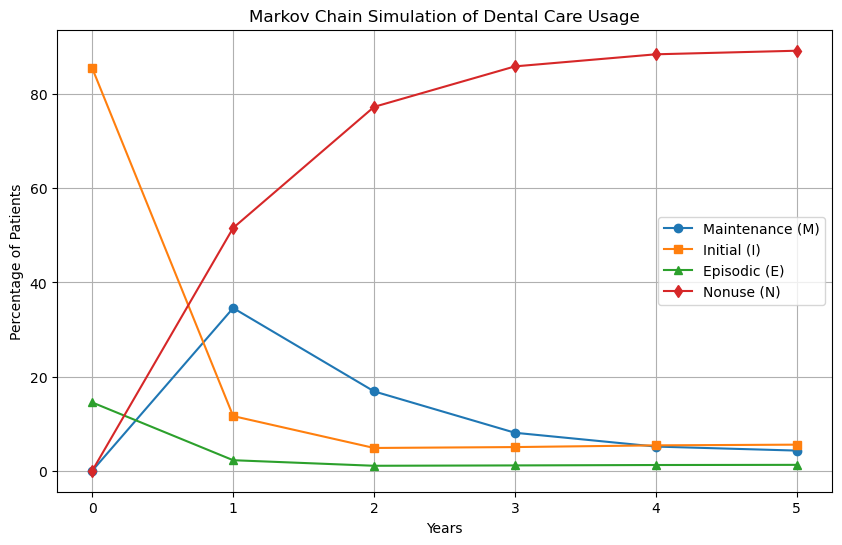

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the transition matrix P
P = np.array([
    [0.346, 0.014, 0.003, 0.637],  # M to (M, I, E, N)
    [0.372, 0.110, 0.010, 0.508],  # I to (M, I, E, N)
    [0.190, 0.152, 0.095, 0.562],  # E to (M, I, E, N)
    [0.003, 0.053, 0.012, 0.933]   # N to (M, I, E, N)
])

# Initial distribution: 14.5% in E, 85.5% in I
initial_state = np.array([0.0, 0.855, 0.145, 0.0])

# Number of years to simulate
years = 5

# Store results
state_distributions = [initial_state]

# Compute state distributions over time
current_state = initial_state
for _ in range(years):
    next_state = np.dot(current_state, P)  # Multiply by transition matrix
    state_distributions.append(next_state)
    current_state = next_state

# Convert results into a NumPy array for plotting
state_distributions = np.array(state_distributions)

years_range = np.arange(years + 1)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(years_range, state_distributions[:, 0] * 100, marker='o', label='Maintenance (M)')
plt.plot(years_range, state_distributions[:, 1] * 100, marker='s', label='Initial (I)')
plt.plot(years_range, state_distributions[:, 2] * 100, marker='^', label='Episodic (E)')
plt.plot(years_range, state_distributions[:, 3] * 100, marker='d', label='Nonuse (N)')

# Graph details
plt.xlabel('Years')
plt.ylabel('Percentage of Patients')
plt.title('Markov Chain Simulation of Dental Care Usage')
plt.legend()
plt.grid(True)
plt.show()
